<a href="https://colab.research.google.com/github/deepanshudaw/Adversarial-Attacks/blob/master/Targeted_Hierarchical_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Idea

![alt text](https://drive.google.com/uc?authuser=0&id=1a62cHiH8MLYizC_RdF3cQrYatKbVffJO&export=download)

Importing uselful libraries

In [0]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import time
import sys

In [0]:
mnist = keras.datasets.mnist

In [0]:
(train_images, train_label), (test_images, test_label) = mnist.load_data()

Scaling the data

In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [0]:
breakdown_acc=0.7
distortion_list = [0,0.01,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.7]
model=[]
model.insert(0,"Deepanshu")

#Distorting

In [0]:
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
def colourmat(pred,test_label):
  cm = confusion_matrix(pred, test_label)
  np.set_printoptions(precision=2)
  print('Confusion matrix')
  print(cm)
  plt.figure()
  plot_confusion_matrix(cm,np.unique(test_label), title='Confusion matrix')
  plt.show()

In [0]:
def Hdistort(test,distortion,i):
  dist_test=np.empty([784])
  for j in range(784):
    dist_test[j]=test[i][j]
  s=np.random.choice(784, (int)(784*distortion),replace=False)
  for k in s:
    dist_test[k]=random.randint(0,254)/255
  return dist_test.reshape(1,28,28)

def create_dist(test_images,test_lbl,model_no):
  dist_test = np.empty([test_lbl.shape[0],28,28])
  acc = []
  
  test=np.empty([test_lbl.shape[0],28,28])
  for i in range(test_lbl.shape[0]):
    for j in range(28):
      for k in range(28):
        test[i][j][k]=test_images[i][j][k]
  test=test.reshape(test_lbl.shape[0],784)
  
  for j,distortion in enumerate(distortion_list):
    dist_test = np.empty([test_lbl.shape[0],28,28])
    for i in range(test_lbl.shape[0]):
      dist_test[i] = Hdistort(test,distortion,i)
    pred=np.argmax(model[model_no].predict(dist_test),axis=1)
    test_acc=accuracy_score(pred,test_lbl)
    acc.insert(j,test_acc)
    print("Distortion: ",distortion,"                  ","Accuracy:  ",test_acc)
    colourmat(pred,test_lbl)
    print()
    print("---------------------------------------------------------")
  if (acc[len(distortion_list)-1]<breakdown_acc):
    plotgraph(acc,distortion_list)
  else:
    print("Accuracy didn't fall below {}%".format(breakdown_acc*100))

In [0]:
def plotgraph(acc,distortion):
  plt.xlabel('Distortion')
  plt.ylabel('Accuracy')
  xs = acc
  ys = distortion_list
  for i in range(len(distortion_list)):
    if np.sign(breakdown_acc-acc[i])==1:
      cur = i
      prev = i-1
      break
  x = distortion_list[prev]+((acc[prev]-breakdown_acc)*(distortion_list[cur]-distortion_list[prev])/(acc[prev]-acc[cur]))
  print("Breakdown Distortion: ",x)
  plt.plot(ys,xs)
  plt.plot(x,breakdown_acc,'ro')
  plt.title("Variation of accuracy with distortion")
  plt.show

#Classification of circle vs non circle 

```
Model1
```



In [0]:
model1 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(2, activation=tf.nn.softmax)
])


W0622 04:49:31.159162 139952125450112 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [0]:
model1.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
train_label_h1=np.empty([60000,])
for i in range(60000):
  if train_label[i]==1 or train_label[i]==2 or train_label[i]==3 or train_label[i]==4 or train_label[i]==5 or train_label[i]==7:    #||3||4||5||7
    train_label_h1[i]=0
  else:
    train_label_h1[i]=1
    
test_label_h1=np.empty([10000,])
for i in range(10000):
  if test_label[i]==1 or test_label[i]==2 or test_label[i]==3 or test_label[i]==4 or test_label[i]==5 or test_label[i]==7:    #||3||4||5||7
    test_label_h1[i]=0
  else:
    test_label_h1[i]=1

In [0]:
model1.fit(train_images, train_label_h1, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 9s 142us/sample - loss: 0.1232 - acc: 0.9554
Epoch 2/5
60000/60000 [==============================] - 7s 112us/sample - loss: 0.0558 - acc: 0.9812
Epoch 3/5
60000/60000 [==============================] - 7s 110us/sample - loss: 0.0377 - acc: 0.9873
Epoch 4/5
60000/60000 [==============================] - 7s 118us/sample - loss: 0.0287 - acc: 0.9905
Epoch 5/5
60000/60000 [==============================] - 7s 111us/sample - loss: 0.0213 - acc: 0.9932


In [0]:
test_loss, test_acc = model1.evaluate(test_images, test_label_h1)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 87us/sample - loss: 0.0540 - acc: 0.9826
Test accuracy: 0.9826


Distortion:  0                    Accuracy:   0.9826
Confusion matrix
[[5961   56]
 [ 118 3865]]


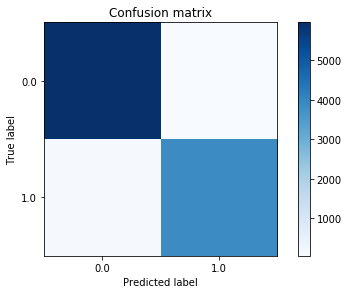


---------------------------------------------------------
Distortion:  0.01                    Accuracy:   0.9831
Confusion matrix
[[5962   52]
 [ 117 3869]]


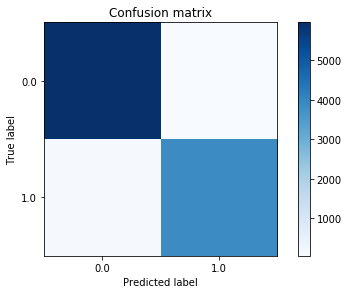


---------------------------------------------------------
Distortion:  0.05                    Accuracy:   0.9715
Confusion matrix
[[5894  100]
 [ 185 3821]]


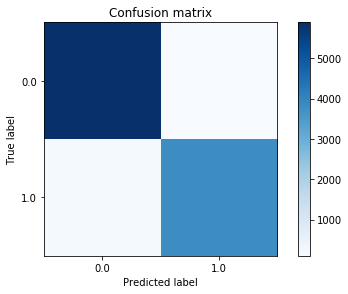


---------------------------------------------------------
Distortion:  0.1                    Accuracy:   0.9477
Confusion matrix
[[5781  225]
 [ 298 3696]]


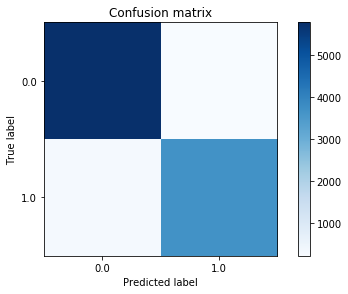


---------------------------------------------------------
Distortion:  0.15                    Accuracy:   0.9112
Confusion matrix
[[5649  458]
 [ 430 3463]]


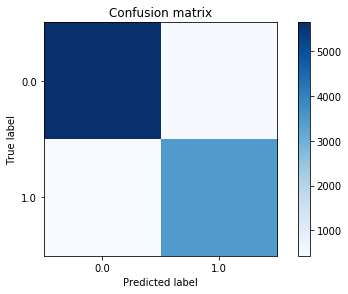


---------------------------------------------------------
Distortion:  0.2                    Accuracy:   0.8617
Confusion matrix
[[5541  845]
 [ 538 3076]]


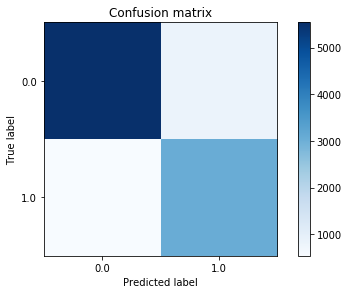


---------------------------------------------------------
Distortion:  0.25                    Accuracy:   0.8067
Confusion matrix
[[5456 1310]
 [ 623 2611]]


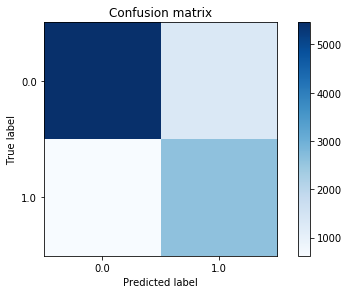


---------------------------------------------------------
Distortion:  0.3                    Accuracy:   0.76
Confusion matrix
[[5416 1737]
 [ 663 2184]]


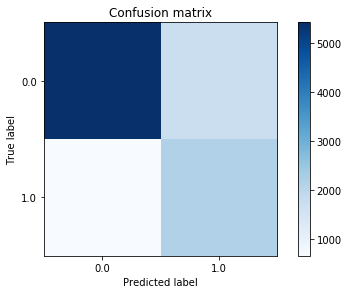


---------------------------------------------------------
Distortion:  0.35                    Accuracy:   0.712
Confusion matrix
[[5408 2209]
 [ 671 1712]]


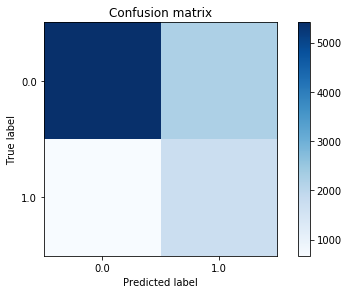


---------------------------------------------------------
Distortion:  0.4                    Accuracy:   0.6774
Confusion matrix
[[5491 2638]
 [ 588 1283]]


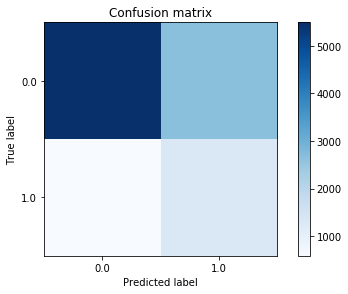


---------------------------------------------------------
Distortion:  0.7                    Accuracy:   0.6079
Confusion matrix
[[6044 3886]
 [  35   35]]


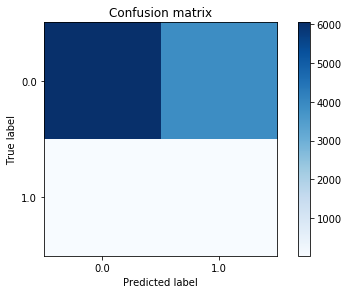


---------------------------------------------------------
Breakdown Distortion:  0.36734104046242777


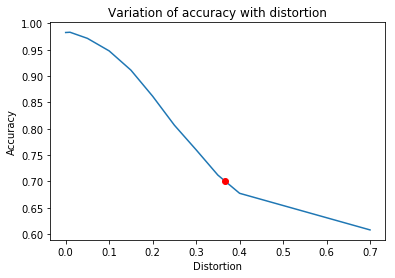

In [0]:
model.insert(1,model1)
create_dist(test_images,test_label_h1,1)

#Classification of 08 or 69

 *Model 2*



In [0]:
train_images_h2=np.empty([23641,28,28])
test_images_h2=np.empty([3921,28,28])
train_label_h2=np.empty([23641,])
test_label_h2=np.empty([3921,])

In [0]:
j=0
for i in range(60000):
  if train_label[i]==0 or train_label[i]==8:   
    train_label_h2[j]=0
    train_images_h2[j]=train_images[i]
    j=j+1
  elif train_label[i]==6 or train_label[i]==9:
    train_label_h2[j]=1
    train_images_h2[j]=train_images[i]
    j=j+1
print(j)    
j=0
for i in range(10000):
  if test_label[i]==0 or test_label[i]==8:   
    test_label_h2[j]=0
    test_images_h2[j]=test_images[i]
    j=j+1
  elif test_label[i]==6 or test_label[i]==9:
    test_label_h2[j]=1
    test_images_h2[j]=test_images[i]
    j=j+1
print(j)   

23641
3921


In [0]:
model2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(2, activation=tf.nn.softmax)
])
model2.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
model2.fit(train_images_h2, train_label_h2, epochs=5)

Epoch 1/5
23641/23641 [==============================] - 3s 124us/sample - loss: 0.0897 - acc: 0.9695
Epoch 2/5
23641/23641 [==============================] - 3s 110us/sample - loss: 0.0396 - acc: 0.9865
Epoch 3/5
23641/23641 [==============================] - 3s 118us/sample - loss: 0.0266 - acc: 0.9914
Epoch 4/5
23641/23641 [==============================] - 3s 127us/sample - loss: 0.0206 - acc: 0.9926
Epoch 5/5
23641/23641 [==============================] - 3s 119us/sample - loss: 0.0131 - acc: 0.9958


In [0]:
test_loss, test_acc = model2.evaluate(test_images_h2, test_label_h2)
print('Test accuracy:', test_acc)

3921/3921 [==============================] - 0s 50us/sample - loss: 0.0320 - acc: 0.9888
Test accuracy: 0.98877835


The distortion Testing:

Distortion:  0                    Accuracy:   0.9887783728640653
Confusion matrix
[[1943   33]
 [  11 1934]]


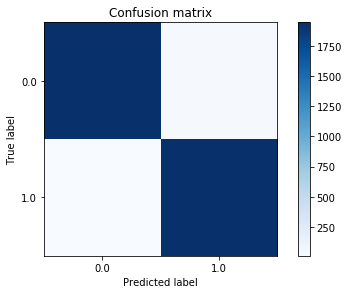


---------------------------------------------------------
Distortion:  0.01                    Accuracy:   0.9880132619229788
Confusion matrix
[[1940   33]
 [  14 1934]]


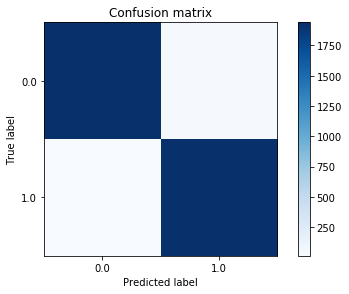


---------------------------------------------------------
Distortion:  0.05                    Accuracy:   0.9857179290997194
Confusion matrix
[[1920   22]
 [  34 1945]]


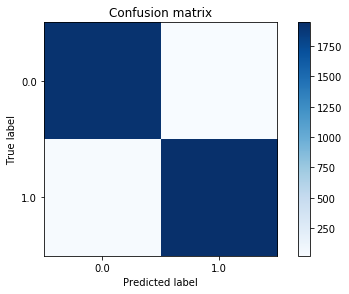


---------------------------------------------------------
Distortion:  0.1                    Accuracy:   0.9693955623565417
Confusion matrix
[[1859   25]
 [  95 1942]]


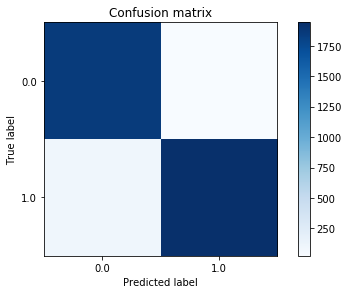


---------------------------------------------------------
Distortion:  0.15                    Accuracy:   0.944912012241775
Confusion matrix
[[1752   14]
 [ 202 1953]]


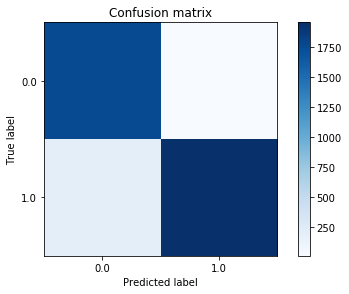


---------------------------------------------------------
Distortion:  0.2                    Accuracy:   0.899770466717674
Confusion matrix
[[1572   11]
 [ 382 1956]]


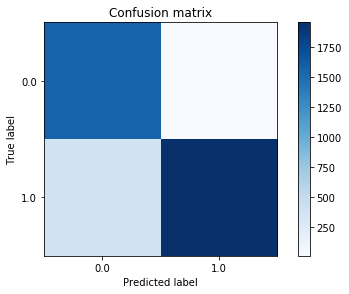


---------------------------------------------------------
Distortion:  0.25                    Accuracy:   0.826064779393012
Confusion matrix
[[1278    6]
 [ 676 1961]]


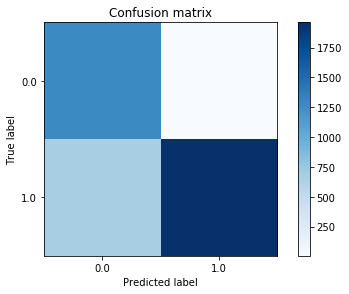


---------------------------------------------------------
Distortion:  0.3                    Accuracy:   0.7439428717163988
Confusion matrix
[[ 957    7]
 [ 997 1960]]


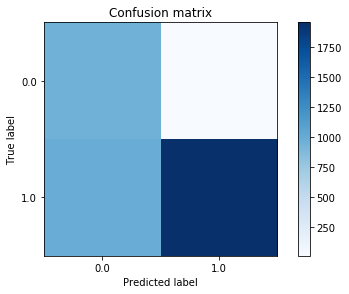


---------------------------------------------------------
Distortion:  0.35                    Accuracy:   0.6722774802346341
Confusion matrix
[[ 670    1]
 [1284 1966]]


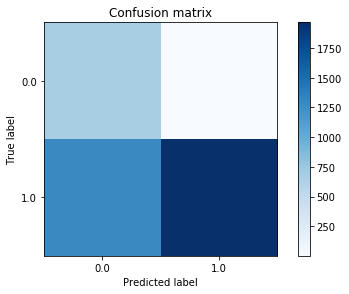


---------------------------------------------------------
Distortion:  0.4                    Accuracy:   0.6023973476154042
Confusion matrix
[[ 397    2]
 [1557 1965]]


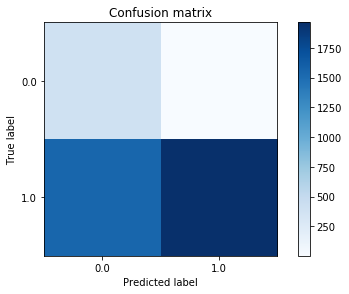


---------------------------------------------------------
Distortion:  0.7                    Accuracy:   0.5019127773527161
Confusion matrix
[[   1    0]
 [1953 1967]]


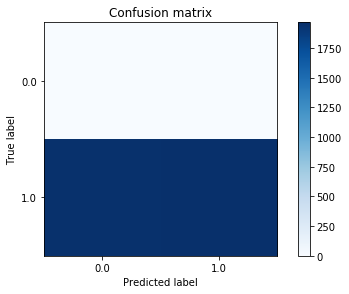


---------------------------------------------------------
Breakdown Distortion:  0.3306583629893239


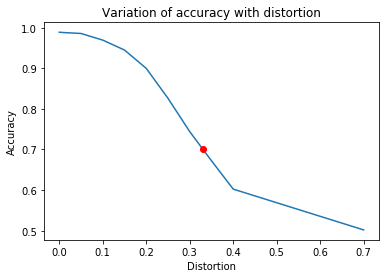

In [0]:
model.insert(2,model2)
create_dist(test_images_h2,test_label_h2,2)

#Classification of 8 and 0
*Model 3*

In [0]:
train_images_h3=np.empty([11774,28,28])
test_images_h3=np.empty([1954,28,28])
train_label_h3=np.empty([11774,])
test_label_h3=np.empty([1954,])

In [0]:
j=0
for i in range(60000):
  if train_label[i]==0:
    train_label_h3[j]=0
    train_images_h3[j]=train_images[i]
    j=j+1
  elif train_label[i]==8:
    train_label_h3[j]=1
    train_images_h3[j]=train_images[i]
    j=j+1
print(j)    
j=0
for i in range(10000):
  if test_label[i]==0:   
    test_label_h3[j]=0
    test_images_h3[j]=test_images[i]
    j=j+1
  elif test_label[i]==8:
    test_label_h3[j]=1
    test_images_h3[j]=test_images[i]
    j=j+1
print(j)   

11774
1954


In [0]:
model3 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(2, activation=tf.nn.softmax)
])
model3.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
model3.fit(train_images_h3, train_label_h3, epochs=5)

Epoch 1/5
11774/11774 [==============================] - 1s 104us/sample - loss: 0.0436 - acc: 0.9851
Epoch 2/5
11774/11774 [==============================] - 1s 104us/sample - loss: 0.0153 - acc: 0.9958
Epoch 3/5
11774/11774 [==============================] - 1s 101us/sample - loss: 0.0117 - acc: 0.9965
Epoch 4/5
11774/11774 [==============================] - 1s 106us/sample - loss: 0.0072 - acc: 0.9978
Epoch 5/5
11774/11774 [==============================] - 1s 100us/sample - loss: 0.0054 - acc: 0.9986


In [0]:
test_loss, test_acc = model3.evaluate(test_images_h3, test_label_h3)
print('Test accuracy:', test_acc)

1954/1954 [==============================] - 0s 115us/sample - loss: 0.0235 - acc: 0.9939
Test accuracy: 0.99385875


Distortion:  0                    Accuracy:   0.9938587512794268
Confusion matrix
[[979  11]
 [  1 963]]


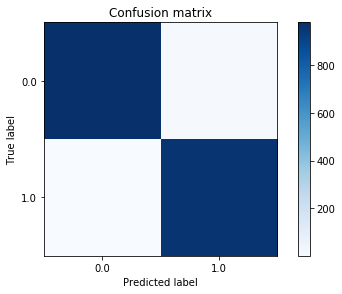


---------------------------------------------------------
Distortion:  0.01                    Accuracy:   0.9933469805527124
Confusion matrix
[[979  12]
 [  1 962]]


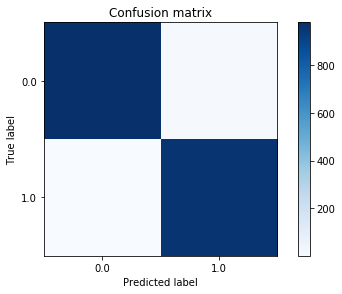


---------------------------------------------------------
Distortion:  0.05                    Accuracy:   0.9928352098259979
Confusion matrix
[[979  13]
 [  1 961]]


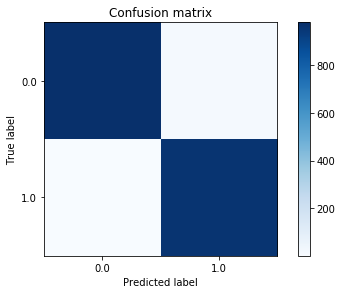


---------------------------------------------------------
Distortion:  0.1                    Accuracy:   0.9928352098259979
Confusion matrix
[[977  11]
 [  3 963]]


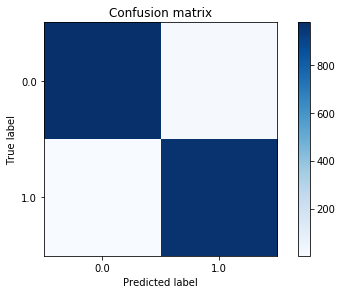


---------------------------------------------------------
Distortion:  0.15                    Accuracy:   0.989252814738997
Confusion matrix
[[970  11]
 [ 10 963]]


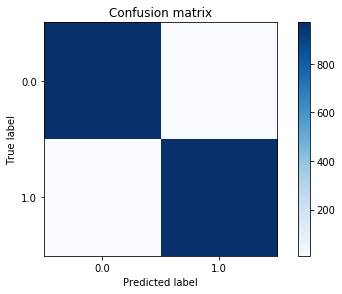


---------------------------------------------------------
Distortion:  0.2                    Accuracy:   0.9882292732855681
Confusion matrix
[[967  10]
 [ 13 964]]


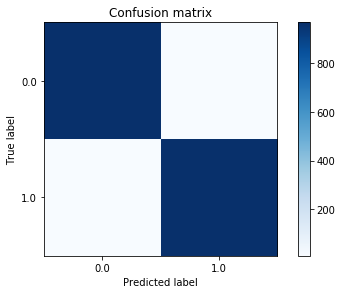


---------------------------------------------------------
Distortion:  0.25                    Accuracy:   0.984646878198567
Confusion matrix
[[964  14]
 [ 16 960]]


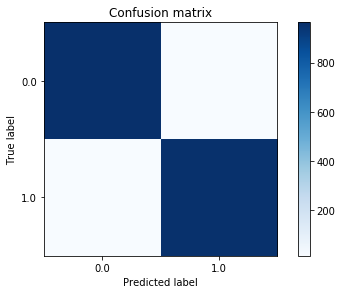


---------------------------------------------------------
Distortion:  0.3                    Accuracy:   0.981064483111566
Confusion matrix
[[952   9]
 [ 28 965]]


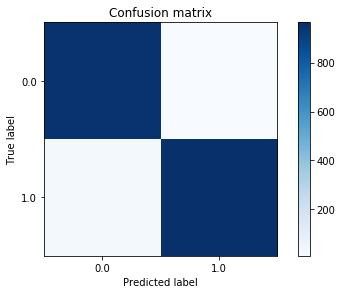


---------------------------------------------------------
Distortion:  0.35                    Accuracy:   0.9744114636642784
Confusion matrix
[[938   8]
 [ 42 966]]


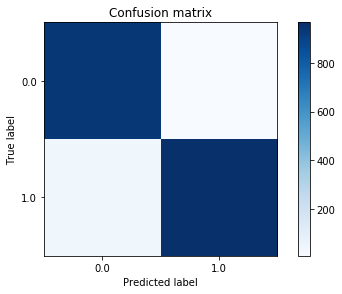


---------------------------------------------------------
Distortion:  0.4                    Accuracy:   0.9667349027635619
Confusion matrix
[[925  10]
 [ 55 964]]


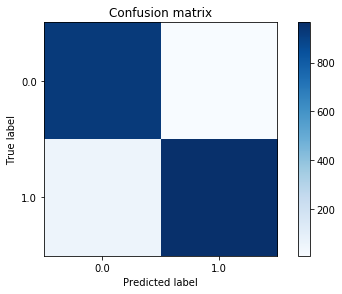


---------------------------------------------------------
Distortion:  0.7                    Accuracy:   0.7727737973387923
Confusion matrix
[[544   8]
 [436 966]]


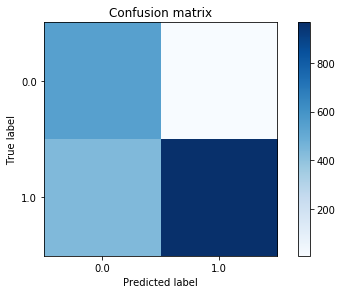


---------------------------------------------------------
Accuracy didn't fall below 70.0%


In [0]:
model.insert(3,model3)
create_dist(test_images_h3,test_label_h3,3)

# Classification of 6 and 9
*Model 4*

In [0]:
train_images_h4=np.empty([11867,28,28])
test_images_h4=np.empty([1967,28,28])
train_label_h4=np.empty([11867,])
test_label_h4=np.empty([1967,])

In [0]:
j=0
for i in range(60000):
  if train_label[i]==6:   
    train_label_h4[j]=0
    train_images_h4[j]=train_images[i]
    j=j+1
  elif train_label[i]==9:
    train_label_h4[j]=1
    train_images_h4[j]=train_images[i]
    j=j+1
print(j)    
j=0
for i in range(10000):
  if test_label[i]==6:   
    test_label_h4[j]=0
    test_images_h4[j]=test_images[i]
    j=j+1
  elif test_label[i]==9:
    test_label_h4[j]=1
    test_images_h4[j]=test_images[i]
    j=j+1
print(j)   

11867
1967


In [0]:
model4 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(2, activation=tf.nn.softmax)
])
model4.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
model4.fit(train_images_h4, train_label_h4, epochs=5)

Epoch 1/5
11867/11867 [==============================] - 1s 115us/sample - loss: 0.0197 - acc: 0.9953
Epoch 2/5
11867/11867 [==============================] - 1s 98us/sample - loss: 0.0044 - acc: 0.9986
Epoch 3/5
11867/11867 [==============================] - 1s 102us/sample - loss: 0.0018 - acc: 0.9996
Epoch 4/5
11867/11867 [==============================] - 1s 95us/sample - loss: 0.0016 - acc: 0.9995
Epoch 5/5
11867/11867 [==============================] - 1s 105us/sample - loss: 8.9074e-04 - acc: 0.9998


In [0]:
test_loss, test_acc = model4.evaluate(test_images_h4, test_label_h4)
print('Test accuracy:', test_acc)

1967/1967 [==============================] - 0s 106us/sample - loss: 0.0061 - acc: 0.9980
Test accuracy: 0.99796647


Distortion:  0                    Accuracy:   0.9979664463650229
Confusion matrix
[[ 956    2]
 [   2 1007]]


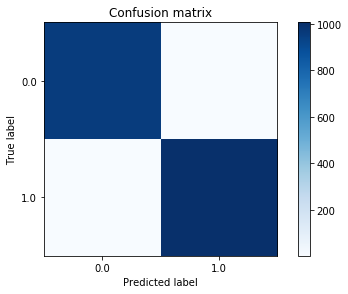


---------------------------------------------------------
Distortion:  0.01                    Accuracy:   0.99644128113879
Confusion matrix
[[ 953    2]
 [   5 1007]]


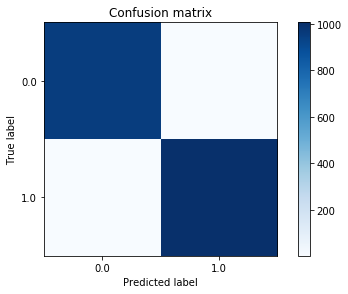


---------------------------------------------------------
Distortion:  0.05                    Accuracy:   0.9979664463650229
Confusion matrix
[[ 955    1]
 [   3 1008]]


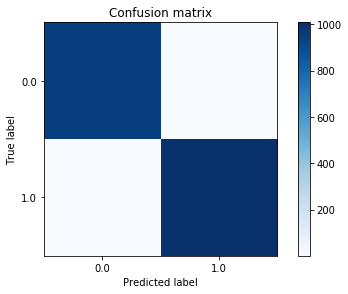


---------------------------------------------------------
Distortion:  0.1                    Accuracy:   0.9959328927300457
Confusion matrix
[[ 953    3]
 [   5 1006]]


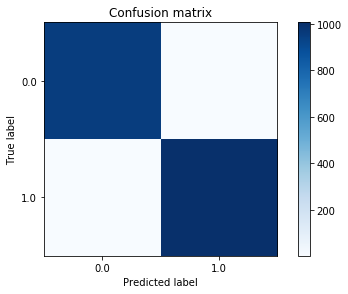


---------------------------------------------------------
Distortion:  0.15                    Accuracy:   0.9938993390950687
Confusion matrix
[[ 950    4]
 [   8 1005]]


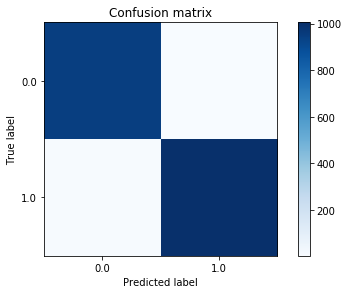


---------------------------------------------------------
Distortion:  0.2                    Accuracy:   0.9918657854600915
Confusion matrix
[[ 948    6]
 [  10 1003]]


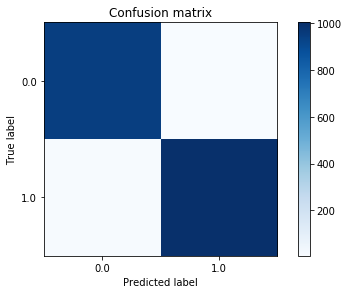


---------------------------------------------------------
Distortion:  0.25                    Accuracy:   0.9857651245551602
Confusion matrix
[[940  10]
 [ 18 999]]


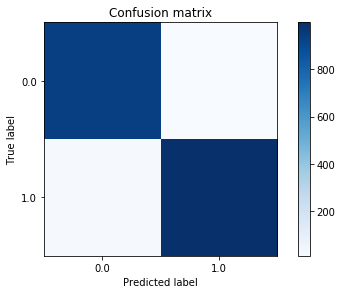


---------------------------------------------------------
Distortion:  0.3                    Accuracy:   0.9862735129639044
Confusion matrix
[[ 938    7]
 [  20 1002]]


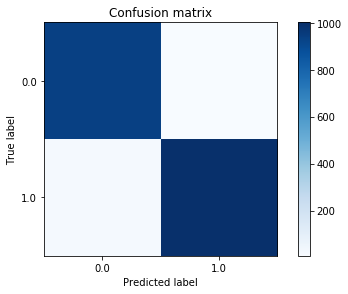


---------------------------------------------------------
Distortion:  0.35                    Accuracy:   0.9776309100152516
Confusion matrix
[[924  10]
 [ 34 999]]


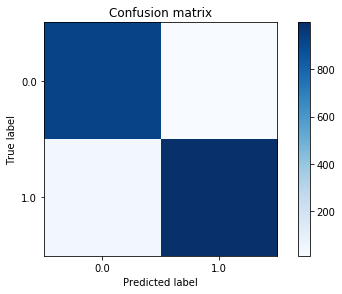


---------------------------------------------------------
Distortion:  0.4                    Accuracy:   0.9572953736654805
Confusion matrix
[[888  14]
 [ 70 995]]


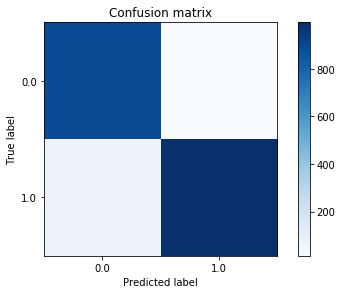


---------------------------------------------------------
Distortion:  0.7                    Accuracy:   0.8002033553634977
Confusion matrix
[[621  56]
 [337 953]]


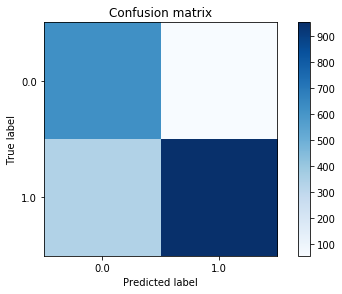


---------------------------------------------------------
Accuracy didn't fall below 70.0%


In [0]:
model.insert(4,model4)
create_dist(test_images_h4,test_label_h4,4)

# Classification of 147 and 235
*Model 5*

In [0]:
train_no=36359
test_no=6079
train_images_h5=np.empty([train_no,28,28])
test_images_h5=np.empty([test_no,28,28])
train_label_h5=np.empty([train_no,])
test_label_h5=np.empty([test_no,])

In [0]:
j=0
for i in range(60000):
  if train_label[i]==1 or train_label[i]==4 or train_label[i]==7:   
    train_label_h5[j]=0
    train_images_h5[j]=train_images[i]
    j=j+1
  elif train_label[i]==2 or train_label[i]==3 or train_label[i]==5:
    train_label_h5[j]=1
    train_images_h5[j]=train_images[i]
    j=j+1
print(j)    
j=0
for i in range(10000):
  if test_label[i]==1 or test_label[i]==4 or test_label[i]==7:   
    test_label_h5[j]=0
    test_images_h5[j]=test_images[i]
    j=j+1
  elif test_label[i]==2 or test_label[i]==3 or test_label[i]==5:
    test_label_h5[j]=1
    test_images_h5[j]=test_images[i]
    j=j+1
print(j)   

36359
6079


In [0]:
model5 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(2, activation=tf.nn.softmax)
])
model5.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
model5.fit(train_images_h5, train_label_h5, epochs=5)

Epoch 1/5
36359/36359 [==============================] - 2s 66us/sample - loss: 0.0596 - acc: 0.9801
Epoch 2/5
36359/36359 [==============================] - 2s 64us/sample - loss: 0.0221 - acc: 0.9930
Epoch 3/5
36359/36359 [==============================] - 2s 64us/sample - loss: 0.0147 - acc: 0.9951
Epoch 4/5
36359/36359 [==============================] - 2s 64us/sample - loss: 0.0092 - acc: 0.9971
Epoch 5/5
36359/36359 [==============================] - 2s 64us/sample - loss: 0.0061 - acc: 0.9981


In [0]:
test_loss, test_acc = model5.evaluate(test_images_h5, test_label_h5)
print('Test accuracy:', test_acc)

6079/6079 [==============================] - 0s 48us/sample - loss: 0.0256 - acc: 0.9926
Test accuracy: 0.99259746


In [0]:
model5.predict(test_images_h5).shape

(6079, 2)

Distortion:  0                    Accuracy:   0.9925974666886
Confusion matrix
[[3121   21]
 [  24 2913]]


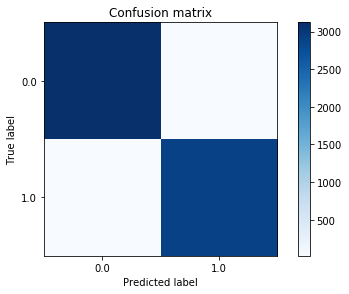


---------------------------------------------------------
Distortion:  0.01                    Accuracy:   0.9921039644678401
Confusion matrix
[[3118   21]
 [  27 2913]]


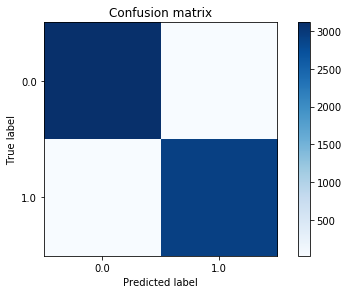


---------------------------------------------------------
Distortion:  0.05                    Accuracy:   0.9858529363382135
Confusion matrix
[[3075   16]
 [  70 2918]]


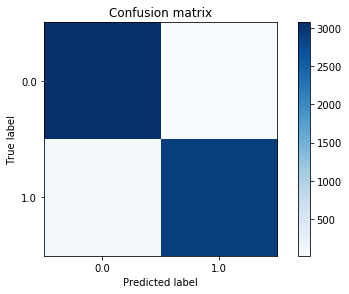


---------------------------------------------------------
Distortion:  0.1                    Accuracy:   0.9516367823655206
Confusion matrix
[[2860    9]
 [ 285 2925]]


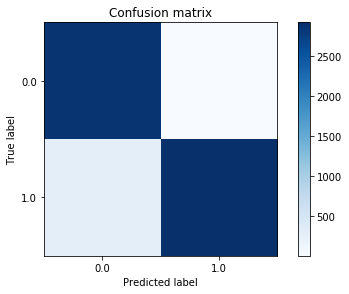


---------------------------------------------------------
Distortion:  0.15                    Accuracy:   0.868399407797335
Confusion matrix
[[2355   10]
 [ 790 2924]]


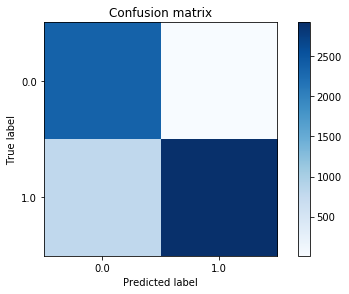


---------------------------------------------------------
Distortion:  0.2                    Accuracy:   0.7736469814114163
Confusion matrix
[[1781   12]
 [1364 2922]]


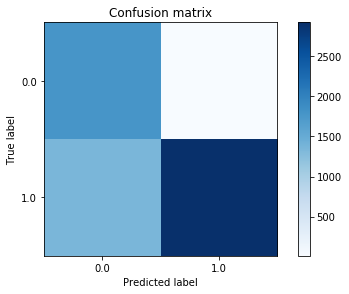


---------------------------------------------------------
Distortion:  0.25                    Accuracy:   0.6923836157262707
Confusion matrix
[[1284    9]
 [1861 2925]]


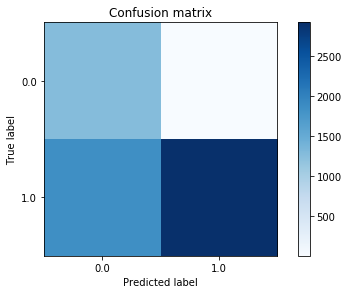


---------------------------------------------------------
Distortion:  0.3                    Accuracy:   0.6285573285079783
Confusion matrix
[[ 895    8]
 [2250 2926]]


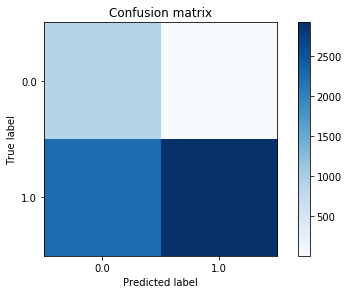


---------------------------------------------------------
Distortion:  0.35                    Accuracy:   0.5885836486264188
Confusion matrix
[[ 656   12]
 [2489 2922]]


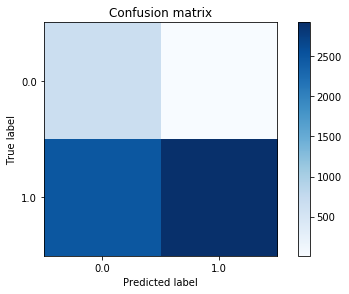


---------------------------------------------------------
Distortion:  0.4                    Accuracy:   0.5546964961342326
Confusion matrix
[[ 447    9]
 [2698 2925]]


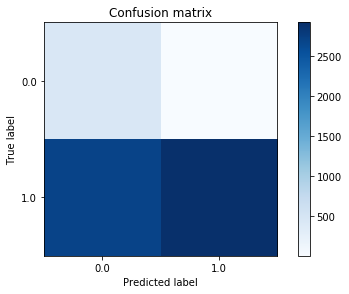


---------------------------------------------------------
Distortion:  0.7                    Accuracy:   0.4887316992926468
Confusion matrix
[[  37    0]
 [3108 2934]]


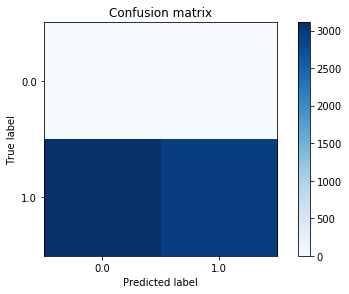


---------------------------------------------------------
Breakdown Distortion:  0.24531376518218623


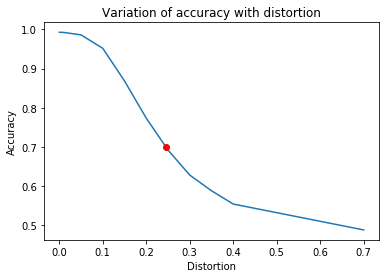

In [0]:
model.insert(5,model5)
create_dist(test_images_h5,test_label_h5,5)

#Multiclass of 147
*Model 6*

In [0]:
train_no=18849
test_no=2972
train_images_h6=np.empty([train_no,28,28])
test_images_h6=np.empty([test_no,28,28])
train_label_h6=np.empty([train_no,])
test_label_h6=np.empty([test_no,])

In [0]:
model6 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(3, activation=tf.nn.softmax)
])
model6.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
train_images_h6.shape

(18849, 28, 28)

In [0]:
j=0
for i in range(60000):
  if train_label[i]==1:   
    train_label_h6[j]=0
    train_images_h6[j]=train_images[i]
    j=j+1
  elif train_label[i]==4:
    train_label_h6[j]=1
    train_images_h6[j]=train_images[i]
    j=j+1
  elif  train_label[i]==7:
    train_label_h6[j]=2
    train_images_h6[j]=train_images[i]
    j=j+1
print(j)    
j=0
for i in range(10000):
  if test_label[i]==1:   
    test_label_h6[j]=0
    test_images_h6[j]=test_images[i]
    j=j+1
  elif test_label[i]==4:
    test_label_h6[j]=1
    test_images_h6[j]=test_images[i]
    j=j+1
  elif  train_label[i]==7:
    test_label_h6[j]=2
    test_images_h6[j]=test_images[i]
    j=j+1
print(j)

18849
2972


In [0]:
model6.fit(train_images_h6, train_label_h6, epochs=5)

Epoch 1/5
18849/18849 [==============================] - 1s 68us/sample - loss: 0.0598 - acc: 0.9830
Epoch 2/5
18849/18849 [==============================] - 1s 64us/sample - loss: 0.0264 - acc: 0.9917
Epoch 3/5
18849/18849 [==============================] - 1s 64us/sample - loss: 0.0159 - acc: 0.9949
Epoch 4/5
18849/18849 [==============================] - 1s 65us/sample - loss: 0.0120 - acc: 0.9961
Epoch 5/5
18849/18849 [==============================] - 1s 64us/sample - loss: 0.0079 - acc: 0.9979


In [0]:
test_loss, test_acc = model6.evaluate(test_images_h6, test_label_h6)
print('Test accuracy:', test_acc)

2972/2972 [==============================] - 0s 53us/sample - loss: 1.5473 - acc: 0.8170
Test accuracy: 0.81695825


Distortion:  0                    Accuracy:   0.8169582772543742
Confusion matrix
[[1130    0  177]
 [   2  981  361]
 [   3    1  317]]


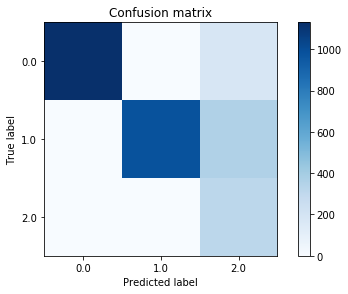


---------------------------------------------------------
Distortion:  0.01                    Accuracy:   0.8189771197846568
Confusion matrix
[[1132    0  171]
 [   1  980  362]
 [   2    2  322]]


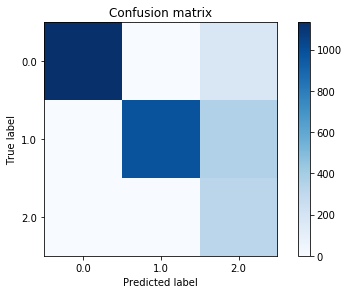


---------------------------------------------------------
Distortion:  0.05                    Accuracy:   0.8142664872139973
Confusion matrix
[[1118    0  159]
 [   2  980  374]
 [  15    2  322]]


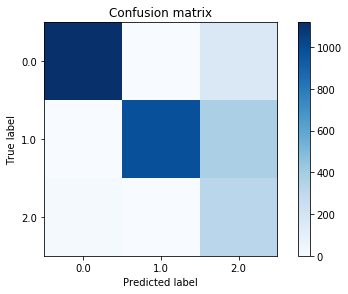


---------------------------------------------------------
Distortion:  0.1                    Accuracy:   0.8078734858681023
Confusion matrix
[[1074    0  143]
 [   5  978  363]
 [  56    4  349]]


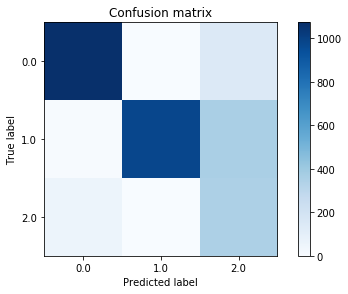


---------------------------------------------------------
Distortion:  0.15                    Accuracy:   0.784656796769852
Confusion matrix
[[1017    1  120]
 [  11  969  389]
 [ 107   12  346]]


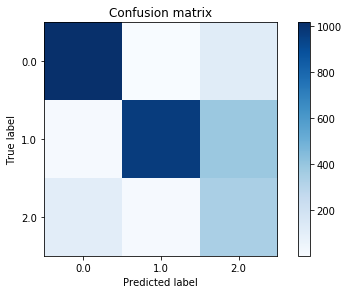


---------------------------------------------------------
Distortion:  0.2                    Accuracy:   0.7483176312247645
Confusion matrix
[[912   0  98]
 [ 25 965 410]
 [198  17 347]]


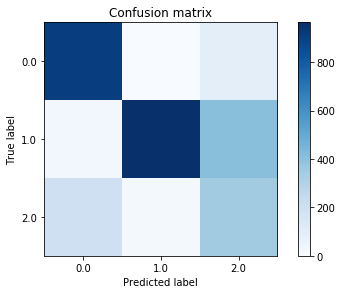


---------------------------------------------------------
Distortion:  0.25                    Accuracy:   0.6830417227456258
Confusion matrix
[[740   0  81]
 [ 64 956 440]
 [331  26 334]]


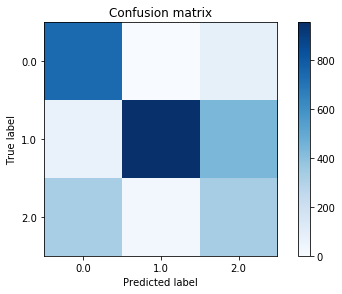


---------------------------------------------------------
Distortion:  0.3                    Accuracy:   0.6322341857335128
Confusion matrix
[[567   0  68]
 [129 951 426]
 [439  31 361]]


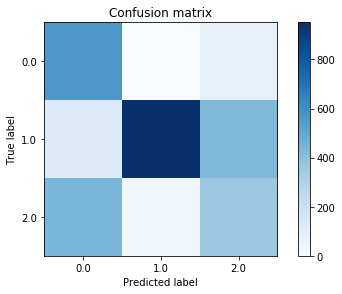


---------------------------------------------------------
Distortion:  0.35                    Accuracy:   0.5693135935397039
Confusion matrix
[[407   0  49]
 [192 945 466]
 [536  37 340]]


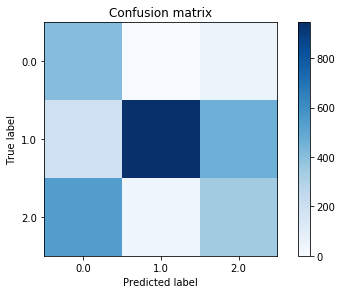


---------------------------------------------------------
Distortion:  0.4                    Accuracy:   0.5131224764468372
Confusion matrix
[[256   0  33]
 [284 941 494]
 [595  41 328]]


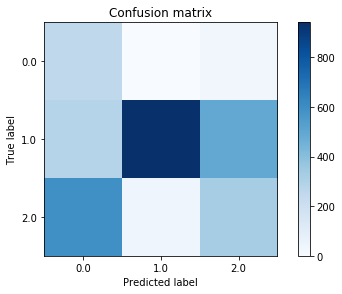


---------------------------------------------------------
Distortion:  0.7                    Accuracy:   0.37617765814266485
Confusion matrix
[[  5   0   2]
 [658 860 600]
 [472 122 253]]


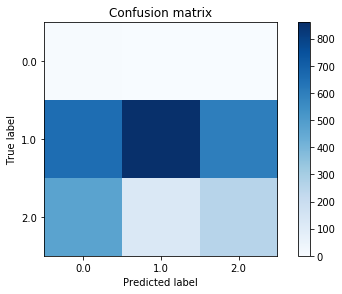


---------------------------------------------------------
Breakdown Distortion:  0.23701030927835054


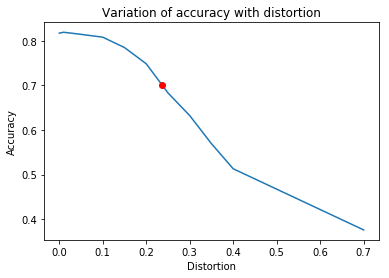

In [0]:
model.insert(6,model6)
create_dist(test_images_h6,test_label_h6,6)

#Multiclass of 235
*Model 7*

In [0]:
train_no=17510
test_no=2722
train_images_h7=np.empty([train_no,28,28])
test_images_h7=np.empty([test_no,28,28])
train_label_h7=np.empty([train_no,])
test_label_h7=np.empty([test_no,])

In [0]:
j=0
for i in range(60000):
  if train_label[i]==2:   
    train_label_h7[j]=0
    train_images_h7[j]=train_images[i]
    j=j+1
  elif train_label[i]==3:
    train_label_h7[j]=1
    train_images_h7[j]=train_images[i]
    j=j+1
  elif  train_label[i]==5:
    train_label_h7[j]=2
    train_images_h7[j]=train_images[i]
    j=j+1
print(j)    
j=0
for i in range(10000):
  if test_label[i]==2:   
    test_label_h7[j]=0
    test_images_h7[j]=test_images[i]
    j=j+1
  elif test_label[i]==3:
    test_label_h7[j]=1
    test_images_h7[j]=test_images[i]
    j=j+1
  elif  train_label[i]==5:
    test_label_h7[j]=2
    test_images_h7[j]=test_images[i]
    j=j+1
print(j)

17510
2722


In [0]:
model7 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(3, activation=tf.nn.softmax)
])
model7.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
model7.fit(train_images_h7, train_label_h7, epochs=5)

Epoch 1/5
17510/17510 [==============================] - 1s 68us/sample - loss: 0.1531 - acc: 0.9462
Epoch 2/5
17510/17510 [==============================] - 1s 65us/sample - loss: 0.0600 - acc: 0.9800
Epoch 3/5
17510/17510 [==============================] - 1s 64us/sample - loss: 0.0349 - acc: 0.9890
Epoch 4/5
17510/17510 [==============================] - 1s 65us/sample - loss: 0.0253 - acc: 0.9919
Epoch 5/5
17510/17510 [==============================] - 1s 65us/sample - loss: 0.0172 - acc: 0.9948


In [0]:
test_loss, test_acc = model7.evaluate(test_images_h7, test_label_h7)
print('Test accuracy:', test_acc)

2722/2722 [==============================] - 0s 59us/sample - loss: 0.8961 - acc: 0.8361
Test accuracy: 0.8361499


Distortion:  0                    Accuracy:   0.8361498897869214
Confusion matrix
[[1026    5  199]
 [   4 1003  234]
 [   2    2  247]]


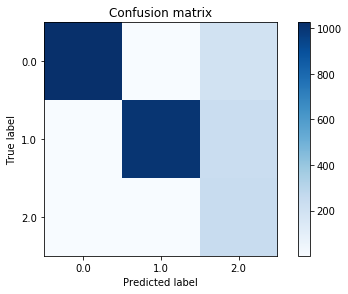


---------------------------------------------------------
Distortion:  0.01                    Accuracy:   0.8332108743570904
Confusion matrix
[[1026    4  202]
 [   4 1002  238]
 [   2    4  240]]


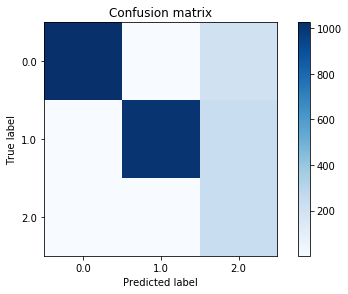


---------------------------------------------------------
Distortion:  0.05                    Accuracy:   0.8346803820720059
Confusion matrix
[[1027   11  210]
 [   4  989  214]
 [   1   10  256]]


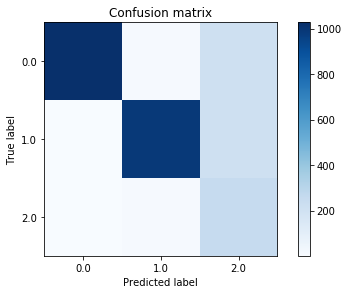


---------------------------------------------------------
Distortion:  0.1                    Accuracy:   0.8232916972814107
Confusion matrix
[[1023   15  223]
 [   8  974  213]
 [   1   21  244]]


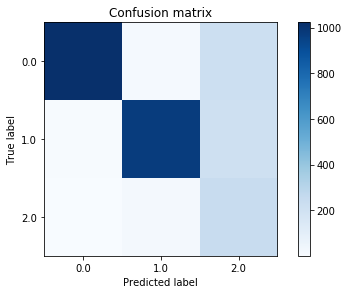


---------------------------------------------------------
Distortion:  0.15                    Accuracy:   0.8111682586333578
Confusion matrix
[[1010   24  249]
 [  15  957  190]
 [   7   29  241]]


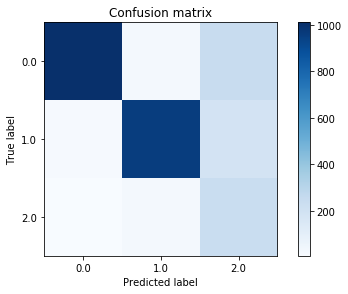


---------------------------------------------------------
Distortion:  0.2                    Accuracy:   0.8008817046289493
Confusion matrix
[[1000   43  232]
 [  18  902  170]
 [  14   65  278]]


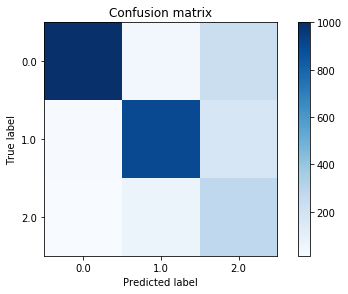


---------------------------------------------------------
Distortion:  0.25                    Accuracy:   0.7803085966201323
Confusion matrix
[[994  63 221]
 [ 22 831 160]
 [ 16 116 299]]


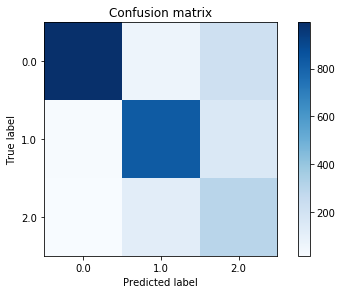


---------------------------------------------------------
Distortion:  0.3                    Accuracy:   0.7332843497428362
Confusion matrix
[[980  82 252]
 [ 29 742 154]
 [ 23 186 274]]


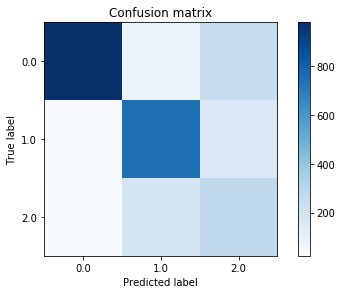


---------------------------------------------------------
Distortion:  0.35                    Accuracy:   0.7064658339456282
Confusion matrix
[[949 107 234]
 [ 37 664 136]
 [ 46 239 310]]


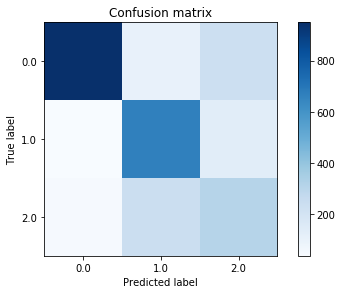


---------------------------------------------------------
Distortion:  0.4                    Accuracy:   0.668626010286554
Confusion matrix
[[930 110 229]
 [ 41 566 127]
 [ 61 334 324]]


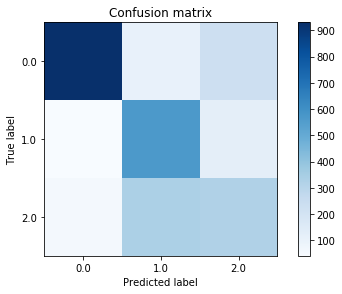


---------------------------------------------------------
Distortion:  0.7                    Accuracy:   0.4239529757531227
Confusion matrix
[[487 122  96]
 [ 44 118  35]
 [501 770 549]]


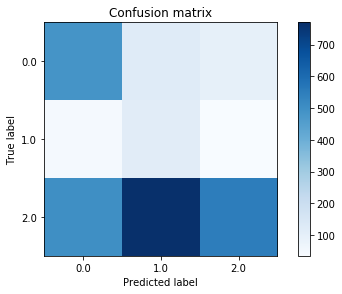


---------------------------------------------------------
Breakdown Distortion:  0.3585436893203884


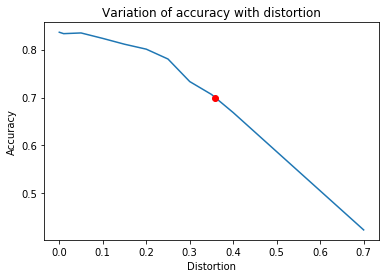

In [0]:
model.insert(7,model7)
create_dist(test_images_h7,test_label_h7,7)

#Final Compilation

The function predict_for predicts the value of kth test image in hierarchical manner

In [0]:
def predict_for_one(k):
  if model1.predict(test_images[k-1:k])[:,0]>.5:
    print("It doesn't have a circle")
    if  model5.predict(test_images[k-1:k])[:,0]>(1/2):
      print("It has straight lines")
      if model6.predict(test_images[k-1:k])[:,0]>(1/3):
        print("It is 1")
      elif model6.predict(test_images[k-1:k])[:,1]>(1/3):
        print("It is 4")
      else:
        print("It is 7")
    else:
      print("It has curves")
      if model7.predict(test_images[k-1:k])[:,0]>(1/3):
        print("It is 2")
      elif model7.predict(test_images[k-1:k])[:,1]>(1/3):
        print("It is 3")
      else:
        print("It is 5")

  else:
    print("It has a circle")
    if model2.predict(test_images[k-1:k])[:,0]>.5:
      print("It is 0 or 8")
      if model3.predict(test_images[k-1:k])[:,0]>.5:
        print("It is 0")
      else:
        print("It is 8")
    else:
      print("It is 6 or 9")
      if model4.predict(test_images[k-1:k])[:,0]>.5:
        print("It is 6")
      else:
        print("It is 9")
  print()

In [0]:
for k in range(1,9):
  predict_for_one(k)

It doesn't have a circle
It has straight lines
It is 7

It doesn't have a circle
It has curves
It is 2

It doesn't have a circle
It has straight lines
It is 1

It has a circle
It is 0 or 8
It is 0

It doesn't have a circle
It has straight lines
It is 4

It doesn't have a circle
It has straight lines
It is 1

It doesn't have a circle
It has straight lines
It is 4

It has a circle
It is 6 or 9
It is 9



for checking the accuracy

In [0]:
def predict_for(ar,k):
  if model1.predict(test_images[k-1:k])[:,0]>.5:
    if  model5.predict(test_images[k-1:k])[:,0]>(1/2):
      if model6.predict(test_images[k-1:k])[:,0]>(1/3):
        ar[k-1]=1
        
      elif model6.predict(test_images[k-1:k])[:,1]>(1/3):
        ar[k-1]=4
        
      else:
        ar[k-1]=7
        
    else:
      if model7.predict(test_images[k-1:k])[:,0]>(1/3):
        ar[k-1]=2
        
      elif model7.predict(test_images[k-1:k])[:,1]>(1/3):
        ar[k-1]=3
        
      else:
        ar[k-1]=5
        

  else:
    if model2.predict(test_images[k-1:k])[:,0]>.5:
      if model3.predict(test_images[k-1:k])[:,0]>.5:
        ar[k-1]=0
        
      else:
        ar[k-1]=8
        
    else:
      if model4.predict(test_images[k-1:k])[:,0]>.5:
        ar[k-1]=6
        
      else:
        ar[k-1]=9

In [0]:
ar=np.empty([10000])
for i in range(1,10001):
  predict_for(ar,i)

In [0]:
ar

array([7., 2., 1., ..., 4., 5., 6.])

In [0]:
accuracy_score(ar,test_label)

0.9701

#Targeted Adversaries

In [0]:
ar=(test_images!=0)

In [0]:
indexes=[]
for i in range(10000):
  indexes.insert(i, np.where(ar[i].reshape(1,784) == True)[1])

In [0]:
length=np.empty([10000])
for i in range (10000):
  length[i] = indexes[i].shape[0]

In [0]:
min(length)

44.0

In [0]:
test = test_images.reshape(10000,784)
def createdist(dist,ran=True):
  dist_images=np.empty([10000,784])
  for i in range(10000):
    for j in range(784):
      dist_images[i][j] = test[i][j]
    s = np.random.choice(indexes[i], (int)(length[i]*dist),replace=False)
    for k in s:
      dist_images[i][k]=(ran)*random.randint(0,254)/255
  return dist_images.reshape(10000,28,28)

In [0]:
distorted = np.empty([len(distortion_list),10000,28,28])
for i in range(len(distortion_list)):
  sys.stdout.write('\r')
  sys.stdout.write("[%-20s] %d%%" % ('>>'*(i+1), 10*(i+1)))
  sys.stdout.flush()
  distorted[i] = createdist(distortion_list[i])

[>>>>>>>>>>>>>>>>>>>>] 100%

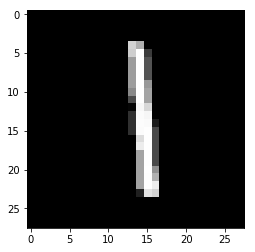

In [0]:
plt.imshow(test_images[9335],cmap='gray')

1843


<function matplotlib.pyplot.show>

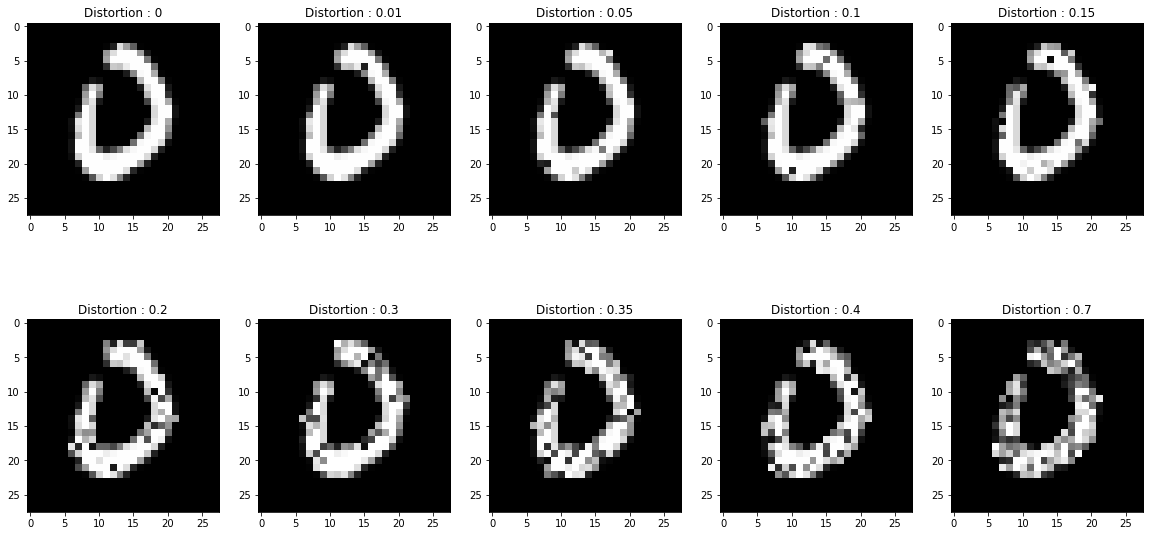

In [0]:
index = random.randint(0,9999)
print(index)
fig = plt.gcf()
fig.set_size_inches(20,10)
for i in range(len(distortion_list)):
  plt.subplot(2,5,i+1)
  plt.title("Distortion : {}".format(distortion_list[i]))
  plt.imshow(distorted[i][index],cmap='gray')
plt.show

In [0]:
distorted_blk = np.empty([len(distortion_list),10000,28,28])
for i in range(len(distortion_list)):
  sys.stdout.write('\r')
  sys.stdout.write("[%-20s] %d%%" % ('>>'*(i+1), 10*(i+1)))
  sys.stdout.flush()
  distorted_blk[i] = createdist(distortion_list[i],ran=False)

[>>>>>>>>>>>>>>>>>>>>] 100%

643


<function matplotlib.pyplot.show>

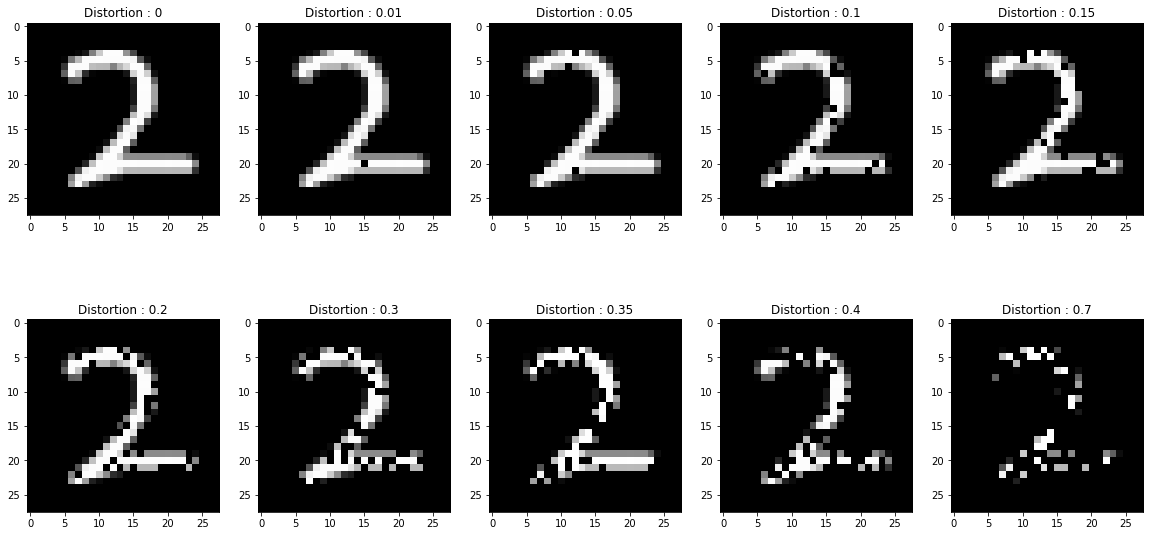

In [0]:
index = random.randint(0,9999)
print(index)
fig = plt.gcf()
fig.set_size_inches(20,10)
for i in range(len(distortion_list)):
  plt.subplot(2,5,i+1)
  plt.title("Distortion : {}".format(distortion_list[i]))
  plt.imshow(distorted_blk[i][index],cmap='gray')
plt.show

In [0]:
def predict_adv(ar,k,test_images):
  if model1.predict(test_images[k-1:k])[:,0]>.5:
    if  model5.predict(test_images[k-1:k])[:,0]>(1/2):
      if model6.predict(test_images[k-1:k])[:,0]>(1/3):
        ar[k-1]=1
        
      elif model6.predict(test_images[k-1:k])[:,1]>(1/3):
        ar[k-1]=4
        
      else:
        ar[k-1]=7
        
    else:
      if model7.predict(test_images[k-1:k])[:,0]>(1/3):
        ar[k-1]=2
        
      elif model7.predict(test_images[k-1:k])[:,1]>(1/3):
        ar[k-1]=3
        
      else:
        ar[k-1]=5
        

  else:
    if model2.predict(test_images[k-1:k])[:,0]>.5:
      if model3.predict(test_images[k-1:k])[:,0]>.5:
        ar[k-1]=0
        
      else:
        ar[k-1]=8
        
    else:
      if model4.predict(test_images[k-1:k])[:,0]>.5:
        ar[k-1]=6
        
      else:
        ar[k-1]=9

In [0]:
print("Distortion\tAccuracy")
for j in range(len(distortion_list)):
  ar=np.empty([10000])
  for i in range(1,10001):
    predict_adv(ar,i,distorted[j])
  print(distortion_list[j],"\t",accuracy_score(ar,test_label))

Distortion	Accuracy
0 	 0.9701
0.01 	 0.9703
0.05 	 0.9693
0.1 	 0.9681
0.15 	 0.9678
0.2 	 0.9675
0.3 	 0.9645
0.35 	 0.9619
0.4 	 0.9604
0.7 	 0.9478


In [0]:
print("Distortion\tAccuracy")
for j in range(len(distortion_list)):
  ar=np.empty([10000])
  for i in range(1,10001):
    predict_adv(ar,i,distorted_blk[j])
  print(distortion_list[j],"\t\t",accuracy_score(ar,test_label))

Distortion	Accuracy
0 		 0.9701
0.01 		 0.9704
0.05 		 0.969
0.1 		 0.9645
0.15 		 0.9636
0.2 		 0.9592
0.3 		 0.9496
0.35 		 0.9429
0.4 		 0.9312
0.7 		 0.7623
